In [1]:
##  correct one 
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
df=pd.read_csv(r"C:\Users\sakth\Downloads\customer_segmentation_linear_dataset.csv")

In [2]:
!pip install --upgrade scikit-learn


In [3]:
df

,Customer_ID,Age,Annual_Income,Policy_Count,Total_Premium_Paid,Claim_Frequency,Policy_Upgrades
0,C1000,18,20000.000000,1,6000.000000,0,0
1,C1001,18,20260.521042,1,6078.156313,0,0
2,C1002,18,20521.042084,1,6156.312625,0,0
3,C1003,18,20781.563126,1,6234.468938,0,0
4,C1004,18,21042.084168,1,6312.625251,0,0
...,...,...,...,...,...,...,...
495,C1495,74,148957.915832,4,44687.374749,5,2
496,C1496,74,149218.436874,4,44765.531062,5,2
497,C1497,74,149478.957916,4,44843.687375,5,2
498,C1498,74,149739.478958,4,44921.843687,5,2


In [4]:
df=df.drop(columns=['Customer_ID'])

In [5]:
df

,Age,Annual_Income,Policy_Count,Total_Premium_Paid,Claim_Frequency,Policy_Upgrades
0,18,20000.000000,1,6000.000000,0,0
1,18,20260.521042,1,6078.156313,0,0
2,18,20521.042084,1,6156.312625,0,0
3,18,20781.563126,1,6234.468938,0,0
4,18,21042.084168,1,6312.625251,0,0
...,...,...,...,...,...,...
495,74,148957.915832,4,44687.374749,5,2
496,74,149218.436874,4,44765.531062,5,2
497,74,149478.957916,4,44843.687375,5,2
498,74,149739.478958,4,44921.843687,5,2


In [6]:
scaler=StandardScaler()
scaled_feature=scaler.fit_transform(df)

In [7]:
pca=PCA(n_components=2)
pca_feature=pca.fit_transform(scaled_feature)

In [8]:
kmeans = KMeans(n_clusters=3, n_init=10,random_state=42)  # Adjust eps if needed
df["Kmeans_Cluster"] = kmeans.fit_predict(scaled_feature)

In [9]:
df.sample(50)

,Age,Annual_Income,Policy_Count,Total_Premium_Paid,Claim_Frequency,Policy_Upgrades,Kmeans_Cluster
406,64,125771.543086,4,37731.462926,4,2,1
73,26,39018.036072,1,11705.410822,0,0,2
314,53,101803.607214,3,30541.082164,3,1,0
334,56,107014.028056,3,32104.208417,3,1,0
142,34,56993.987976,2,17098.196393,1,0,2
57,24,34849.699399,1,10454.909820,0,0,2
487,73,146873.747495,4,44062.124248,5,2,1
65,25,36933.867735,1,11080.160321,0,0,2
469,71,142184.368737,4,42655.310621,5,2,1
177,38,66112.224449,2,19833.667335,2,1,0


In [10]:
def assign_segment(cluster):
    if cluster == 0:
        return "Young Professionals"  
    elif cluster == 1:
        return "High-Risk Customers"  
    elif cluster == 2:
        return "Low-Risk Policyholders"  
df["Customer_Segment"] = df["Kmeans_Cluster"].apply(assign_segment)
df.to_csv("customer_segmentation_labeled.csv", index=False)
print("Labeled dataset saved successfully!")


Labeled dataset saved successfully!


In [11]:
df.sample(50)

,Age,Annual_Income,Policy_Count,Total_Premium_Paid,Claim_Frequency,Policy_Upgrades,Kmeans_Cluster,Customer_Segment
62,25,36152.304609,1,10845.691383,0,0,2,Low-Risk Policyholders
446,68,136192.384770,4,40857.715431,5,2,1,High-Risk Customers
307,53,99979.959920,3,29993.987976,3,1,0,Young Professionals
252,46,85651.302605,2,25695.390782,2,1,0,Young Professionals
346,57,110140.280561,3,33042.084168,3,1,0,Young Professionals
300,52,98156.312625,3,29446.893788,3,1,0,Young Professionals
137,33,55691.382766,2,16707.414830,1,0,2,Low-Risk Policyholders
222,43,77835.671343,2,23350.701403,2,1,0,Young Professionals
256,47,86693.386774,2,26008.016032,2,1,0,Young Professionals
40,22,30420.841683,1,9126.252505,0,0,2,Low-Risk Policyholders


In [12]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(scaled_feature, df["Kmeans_Cluster"])
print("Silhouette Score:", silhouette_avg)
from sklearn.metrics import davies_bouldin_score
db_index = davies_bouldin_score(scaled_feature, df["Kmeans_Cluster"])
print("Davies-Bouldin Index:", db_index)


Silhouette Score: 0.6413286099363383
Davies-Bouldin Index: 0.5229954819038961


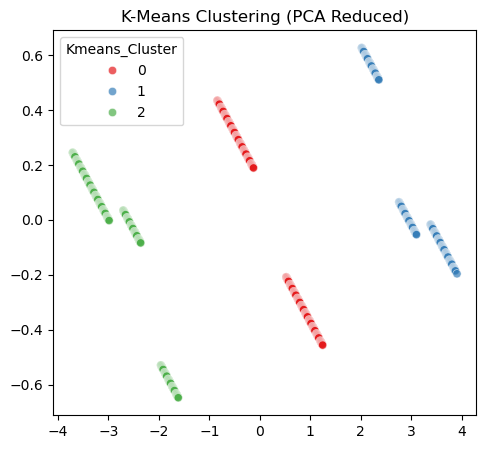

In [13]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=pca_feature[:, 0], y=pca_feature[:, 1], hue=df["Kmeans_Cluster"], palette="Set1", alpha=0.7)
plt.title("K-Means Clustering (PCA Reduced)")
plt.show()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 500 non-null    int64  
 1   Annual_Income       500 non-null    float64
 2   Policy_Count        500 non-null    int64  
 3   Total_Premium_Paid  500 non-null    float64
 4   Claim_Frequency     500 non-null    int64  
 5   Policy_Upgrades     500 non-null    int64  
 6   Kmeans_Cluster      500 non-null    int32  
 7   Customer_Segment    500 non-null    object 
dtypes: float64(2), int32(1), int64(4), object(1)
memory usage: 29.4+ KB


In [15]:
X=df[['Policy_Count','Claim_Frequency','Policy_Upgrades','Kmeans_Cluster']]

In [16]:
X.isnull().sum()

Policy_Count       0
Claim_Frequency    0
Policy_Upgrades    0
Kmeans_Cluster     0
dtype: int64

In [17]:
X

,Policy_Count,Claim_Frequency,Policy_Upgrades,Kmeans_Cluster
0,1,0,0,2
1,1,0,0,2
2,1,0,0,2
3,1,0,0,2
4,1,0,0,2
...,...,...,...,...
495,4,5,2,1
496,4,5,2,1
497,4,5,2,1
498,4,5,2,1


In [34]:
Y.isnull().sum()

Customer_Segment    0
dtype: int64

In [32]:
Y=df[['Customer_Segment']]

In [36]:
Y

,Customer_Segment
0,Low-Risk Policyholders
1,Low-Risk Policyholders
2,Low-Risk Policyholders
3,Low-Risk Policyholders
4,Low-Risk Policyholders
...,...
495,High-Risk Customers
496,High-Risk Customers
497,High-Risk Customers
498,High-Risk Customers


In [38]:
Y.isnull().sum()

Customer_Segment    0
dtype: int64

In [40]:
from  sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42,test_size=0.2,train_size=0.8)

In [42]:
from sklearn.ensemble import RandomForestClassifier
re=RandomForestClassifier()
re.fit(X_train,Y_train)

RandomForestClassifier()

In [43]:
ypred=re.predict(X_test)
from sklearn.metrics import classification_report
fullreport=classification_report(ypred,Y_test)

In [46]:
print(fullreport)

                        precision    recall  f1-score   support

   High-Risk Customers       1.00      1.00      1.00        36
Low-Risk Policyholders       1.00      1.00      1.00        37
   Young Professionals       1.00      1.00      1.00        27

              accuracy                           1.00       100
             macro avg       1.00      1.00      1.00       100
          weighted avg       1.00      1.00      1.00       100



In [48]:
X

,Policy_Count,Claim_Frequency,Policy_Upgrades,Kmeans_Cluster
0,1,0,0,2
1,1,0,0,2
2,1,0,0,2
3,1,0,0,2
4,1,0,0,2
...,...,...,...,...
495,4,5,2,1
496,4,5,2,1
497,4,5,2,1
498,4,5,2,1


In [50]:
X.isnull().sum()

Policy_Count       0
Claim_Frequency    0
Policy_Upgrades    0
Kmeans_Cluster     0
dtype: int64

In [52]:
import numpy as np
inputdata=(4,5,2,1)
inputdataarray=np.asarray(inputdata)
inputdatareshape=inputdataarray.reshape(1,-1)
prediction=re.predict(inputdatareshape)
print(*prediction)

High-Risk Customers


In [54]:
import pickle
with open('customersegmentcorrect1.pkl','wb')as file:
    pickle.dump(re,file)

In [56]:
print(type(re))

<class 'sklearn.ensemble._forest.RandomForestClassifier'>
